In [1]:
import pandas as pd
import numpy as np

from tqdm import tqdm

In [13]:
df = pd.read_csv('UK.csv')

In [14]:
df['sum'] = df.drop('Date notified', axis=1).sum(axis=1)
df

,Date notified,NHS Ayrshire & Arran,NHS Borders,NHS Dumfries & Galloway,NHS Fife,NHS Forth Valley,NHS Grampian,NHS Greater Glasgow & Clyde,NHS Highland,NHS Lanarkshire,NHS Lothian,NHS Orkney,NHS Shetland,NHS Tayside,NHS Western Isles,Scotland,sum
0,43897,*,*,*,*,*,*,*,*,*,*,*,*,*,*,16,16
1,43898,*,*,*,*,*,*,*,*,*,*,*,*,*,*,21,21
2,43899,*,*,*,*,*,*,*,*,*,5,*,*,*,*,23,23
3,43900,*,*,*,*,*,6,*,*,*,7,*,*,*,*,27,27
4,43901,*,*,*,*,*,6,5,*,*,8,*,*,*,*,36,36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
447,44344,17456,2913,4219,11910,13073,15445,73434,5224,42251,32674,74,236,15106,297,234312,234312
448,44345,17509,2913,4221,11933,13097,15454,73673,5255,42334,32754,74,236,15145,297,234895,234895
449,44346,17544,2914,4224,11960,13125,15464,73854,5275,42402,32873,74,236,15179,297,235421,235421
450,44347,17599,2915,4226,11975,13144,15471,74044,5287,42476,32957,74,236,15210,297,235911,235911


<AxesSubplot:xlabel='Date notified', ylabel='sum'>

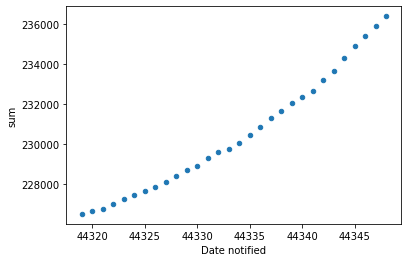

In [29]:
df.iloc[-30:,:].plot(x ='Date notified', y='sum', kind = 'scatter')

In [31]:
from scipy.optimize import curve_fit

def func(x, a, b, c):
    return a * np.exp(-b * x) + c

new_dataframe = df.iloc[-30:,:]
y = np.array(new_dataframe['sum'])
x = np.arange(len(y))
popt, pcov =curve_fit(func, x , y ,p0=(4, 0.1,0.2))

[226505 226644 226729 227012 227248 227472 227672 227840 228078 228423
 228693 228908 229321 229613 229774 230042 230436 230868 231282 231652
 232030 232343 232661 233207 233671 234312 234895 235421 235911 236389]


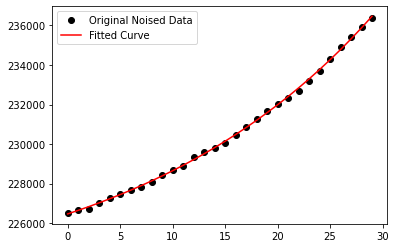

In [32]:
import matplotlib.pyplot as plt

plt.figure()
print(y)
plt.plot(x, y, 'ko', label="Original Noised Data")
plt.plot(x, func(x, *popt), 'r-', label="Fitted Curve")
plt.legend()
plt.show()

In [33]:
r = -popt[1]
r

0.04229122729849467

In [35]:
R = np.exp(6.5*r)
R

1.3163897839241514